In [7]:
library(Seurat)
library(scRepertoire)

Loading required package: ggplot2



In [1]:
getwd()

[1] "/home/rstudio/analysis"

In [2]:
setwd('/home/rstudio/analysis/saved_objects')

In [3]:
# Individual patients
patient3 <- readRDS("patient3.rds")
patient3_transform <- readRDS("patient3_transform.rds")
combined.TCR_p3 <- readRDS("combined_TCR_p3.rds")

patient4 <- readRDS("patient4.rds")
patient4_transform <- readRDS("patient4_transform.rds")
combined.TCR_p4 <- readRDS("combined_TCR_p4.rds")

# Merged & integrated data
merged_seurat <- readRDS("merged_seurat.rds")
combined.TCR_all <- readRDS("combined_TCR_all.rds")

# Combined Seurat + TCR objects
sce_patient3 <- readRDS("sce_patient3.rds")
sce_patient4 <- readRDS("sce_patient4.rds")
sce_all_patients_new <- readRDS("sce_all_patients_new.rds")

In [ ]:
sce_all_patients <- readRDS("sce_all_patients.rds")

In [4]:
setwd('/home/rstudio/analysis/')
getwd()

[1] "/home/rstudio/analysis"

## Clonal Dynamics - clonalHomeostasis, clonalProportion

### Patient 3

### todo - add note here

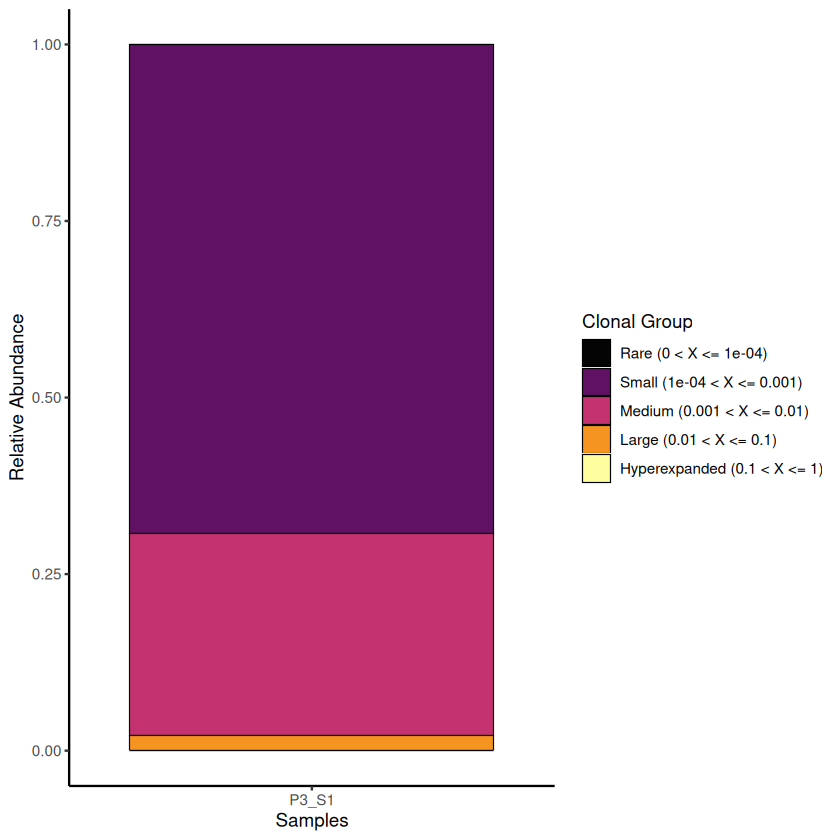

In [9]:
#clonalHomeostasis
clonalHomeostasis(combined.TCR_p3, 
                  cloneCall = "gene")

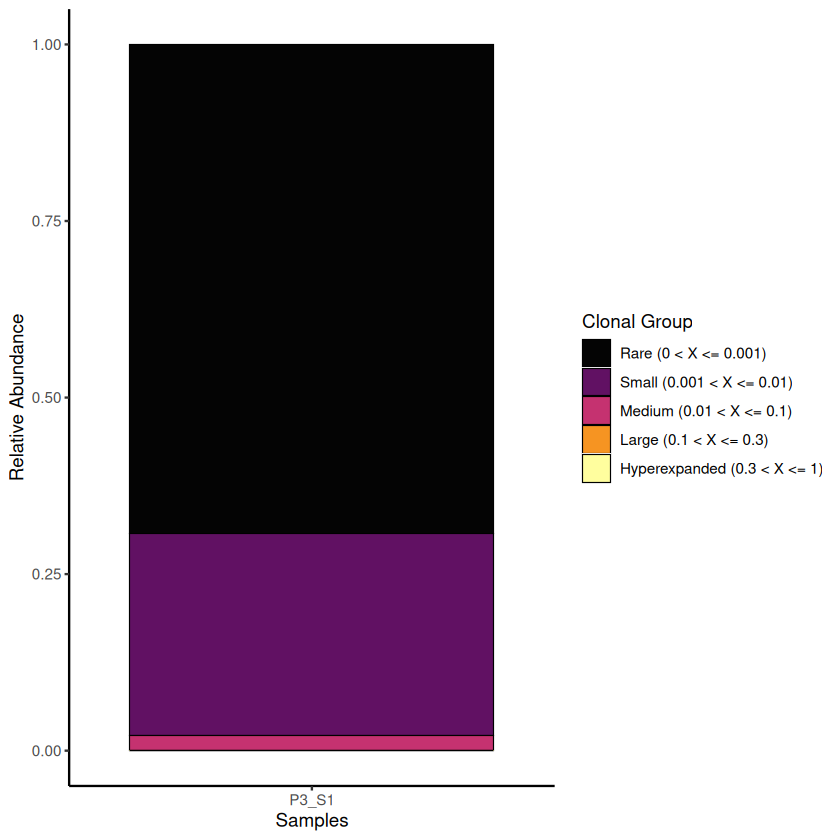

In [10]:
clonalHomeostasis(combined.TCR_p3, 
                  cloneCall = "gene",
                  cloneSize = c(Rare = 0.001, Small = 0.01, Medium = 0.1, Large = 0.3, Hyperexpanded =
    1))

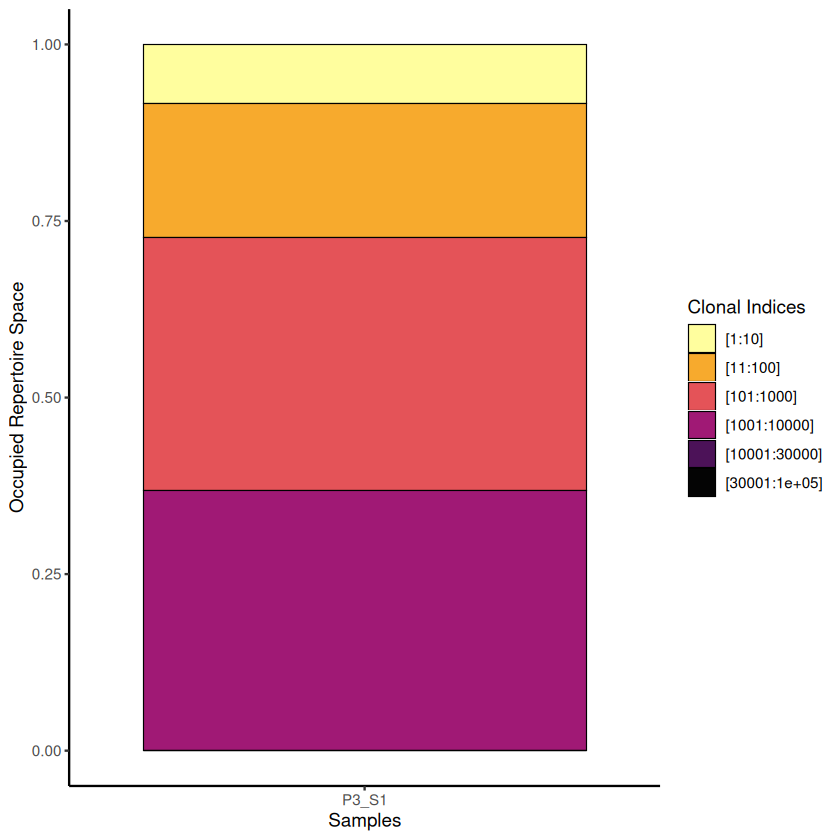

In [11]:
clonalProportion(combined.TCR_p3, 
                 cloneCall = "gene") 

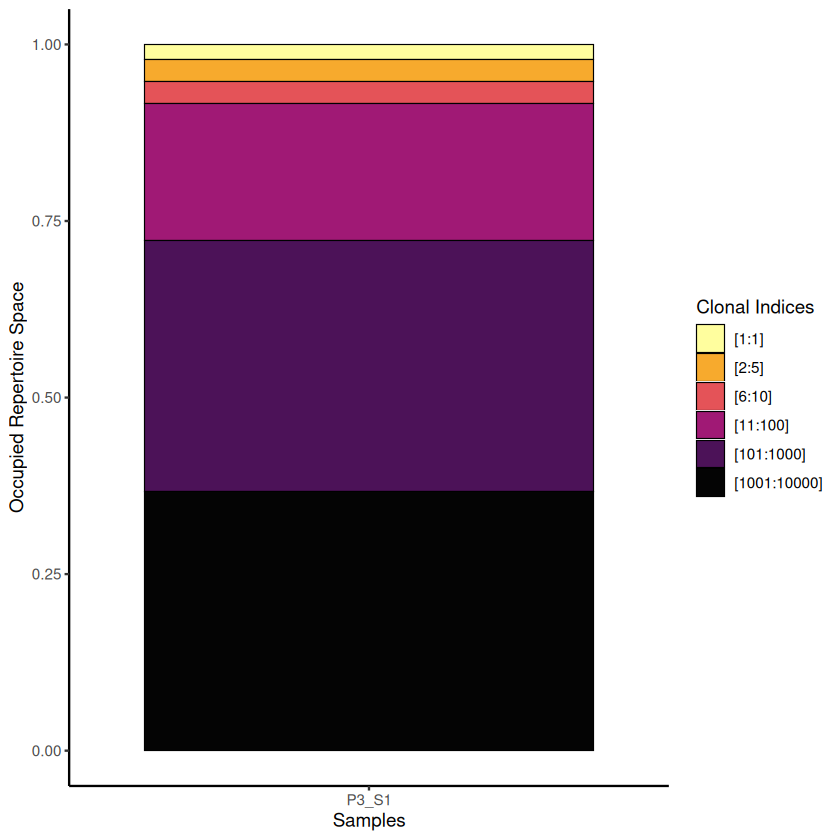

In [12]:
clonalProportion(combined.TCR_p3, 
                 cloneCall = "nt",
                 clonalSplit = c(1, 5, 10, 100, 1000, 10000)) 

## Clonal Bias

In [17]:
sce_all_patients_new <- RunPCA(sce_all_patients_new)
sce_all_patients_new <- FindNeighbors(sce_all_patients_new, dims = 1:30)
sce_all_patients_new <- FindClusters(sce_all_patients_new, resolution = 0.5)

PC_ 1 
Positive:  IL7R, KLF2, FTH1, SELL, SATB1, ANXA1, FOS, S1PR1, SESN3, LNCRNA-IUR 
	   MT-CO3, RPS2, YBX3, ZBTB16, SNED1, RPS18, GPCPD1, IRS2, GPR183, KRT1 
	   RNF130, ACTN1, BACH2, ARL4C, MBP, KCNA3, ABLIM1, ZHX2, SCML1, MT-CO1 
Negative:  TYMS, DUSP4, MKI67, HLA-DRB1, RRM2, TOP2A, CXCL13, HLA-DRA, NCAPG, CENPU 
	   MYO7A, RBPJ, ASPM, TPX2, KIF11, CCNA2, ITGAE, GZMB, STMN1, CDK1 
	   CTLA4, HLA-DRB6, APOBEC3C, UBE2C, CD74, HSPA1A, HMGB2, CCL5, PMAIP1, NKG7 
PC_ 2 
Positive:  DUSP4, CCL5, MYO7A, TNFRSF9, CBLB, ITGAE, LYST, NKG7, CXCL13, KRT86 
	   AKAP5, LAYN, RGS1, HSPA1A, ETV1, PRDM1, VCAM1, RBPJ, CXCR6, GZMB 
	   CTLA4, HAVCR2, ADGRG1, TOX, HLA-DRB1, IKZF3, PRF1, RDH10, GOLIM4, DTHD1 
Negative:  RRM2, MKI67, TYMS, TOP2A, NCAPG, TUBB, UBE2C, ZWINT, CDCA5, CDK1 
	   CENPU, IL7R, BIRC5, KIF18B, KIF11, STMN1, PCLAF, ASPM, SELL, ASF1B 
	   FTH1, KLF2, CDKN3, UHRF1, CCNA2, KIFC1, RAD51, PRR11, VIM, MT-CO3 
PC_ 3 
Positive:  NR4A1, FOSB, HSPA1A, NR4A2, HSPA8, DNAJB1, EGR1, KLF6, ID2, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6489
Number of edges: 256122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8419
Number of communities: 11
Elapsed time: 0 seconds


Smoothing formula not specified. Using: y ~ qss(x, lambda = 3)
Warning message in rq.fit.sfn(x, y, tau = tau, rhs = rhs, control = control, ...):
“tiny diagonals replaced with Inf when calling blkfct
”


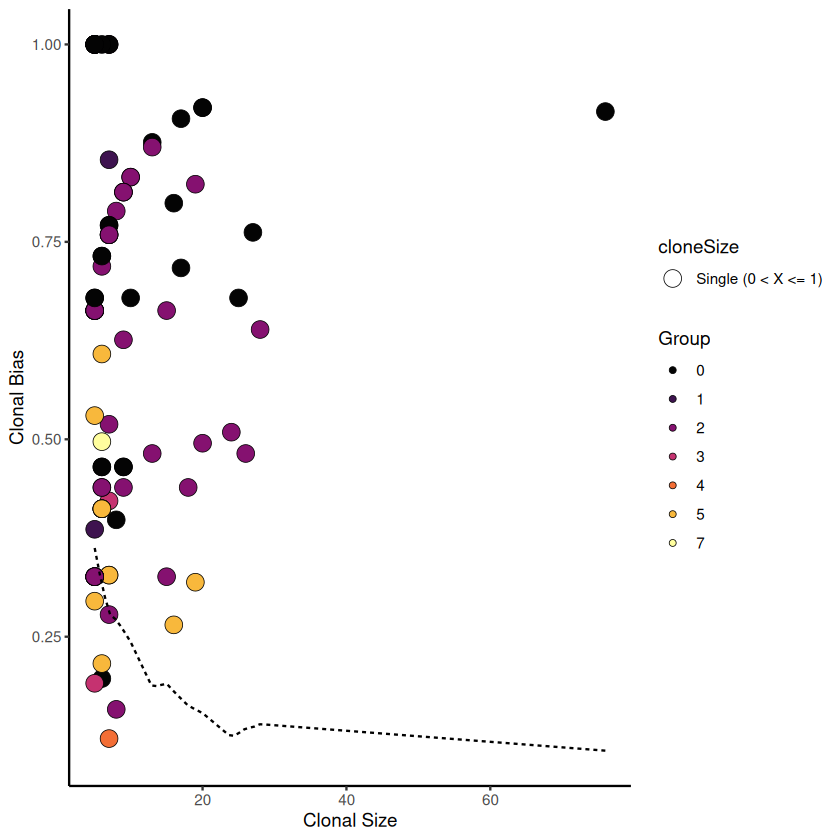

In [18]:
clonalBias(sce_all_patients_new, 
           cloneCall = "aa", 
           split.by = "orig.ident", 
           group.by = "seurat_clusters",
           n.boots = 10, 
           min.expand =5)

## Clonal Diversity

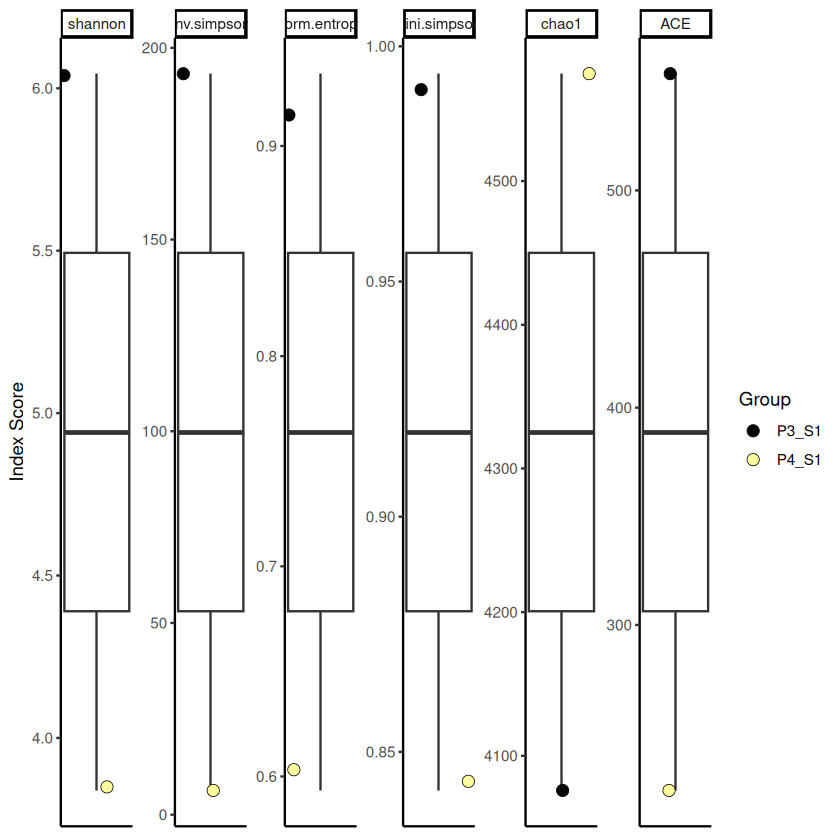

In [19]:
clonalDiversity(combined.TCR_all, 
                cloneCall = "gene")

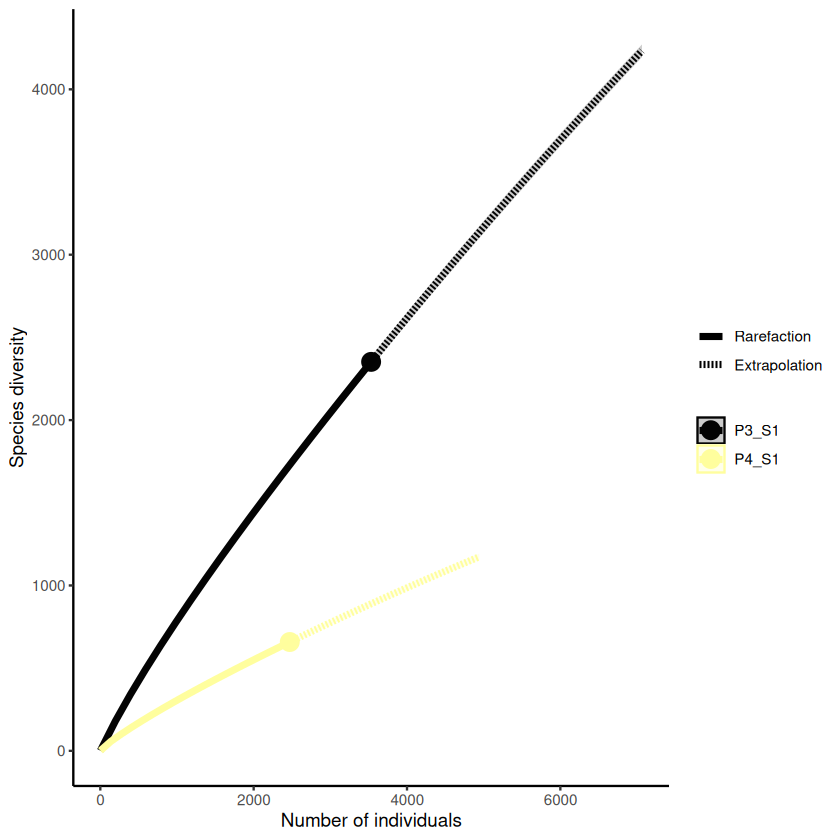

In [20]:
clonalRarefaction(combined.TCR_all,
                  plot.type = 1,
                  hill.numbers = 0,
                  n.boots = 2)

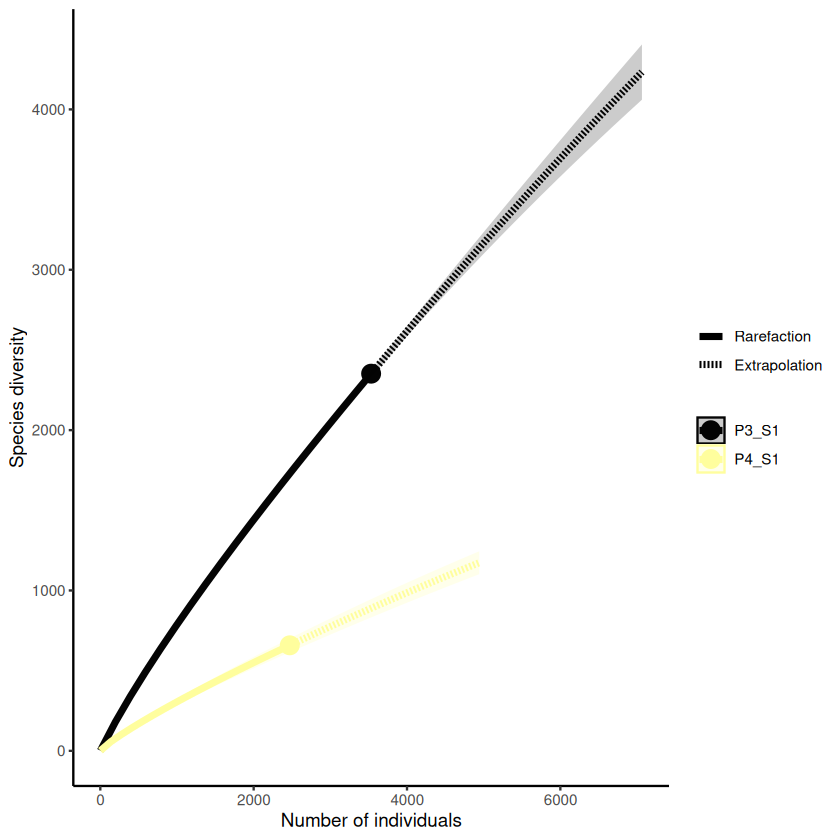

In [21]:
clonalRarefaction(combined.TCR_all,
                  plot.type = 1,
                  hill.numbers = 0,
                  n.boots = 2)

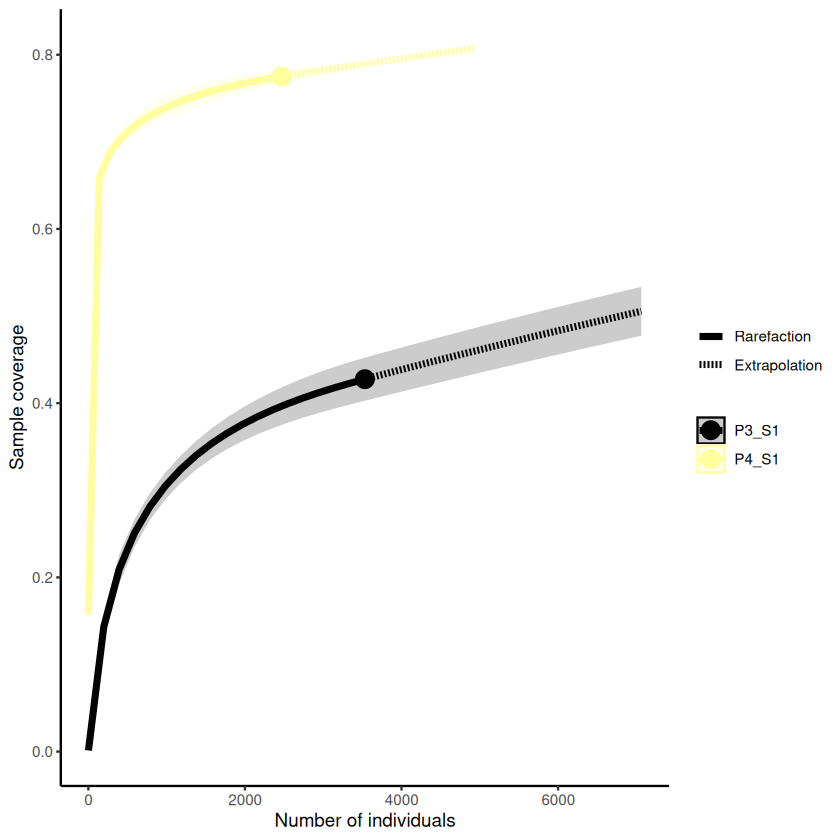

In [23]:
clonalRarefaction(combined.TCR_all,
                  plot.type = 2,
                  hill.numbers = 0,
                  n.boots = 2)

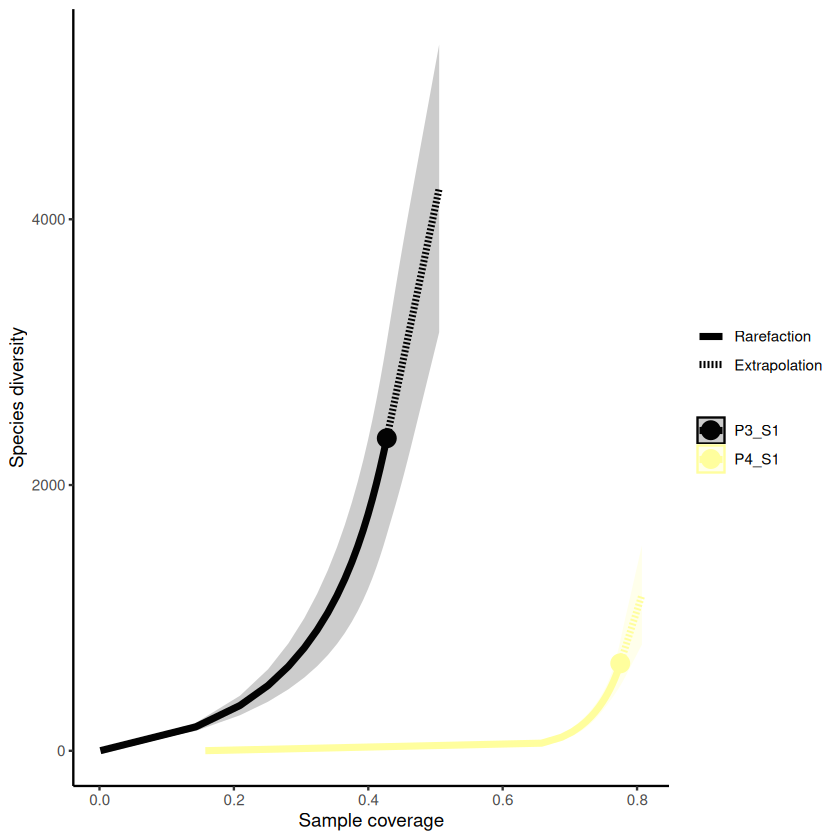

In [25]:
# this is the coverage based rarefaction+extrapol; diversity at equal sampling effort
clonalRarefaction(combined.TCR_all,
                  plot.type = 3,
                  hill.numbers = 0,
                  n.boots = 2)

In [26]:
# Patient 3 can be sampled morre

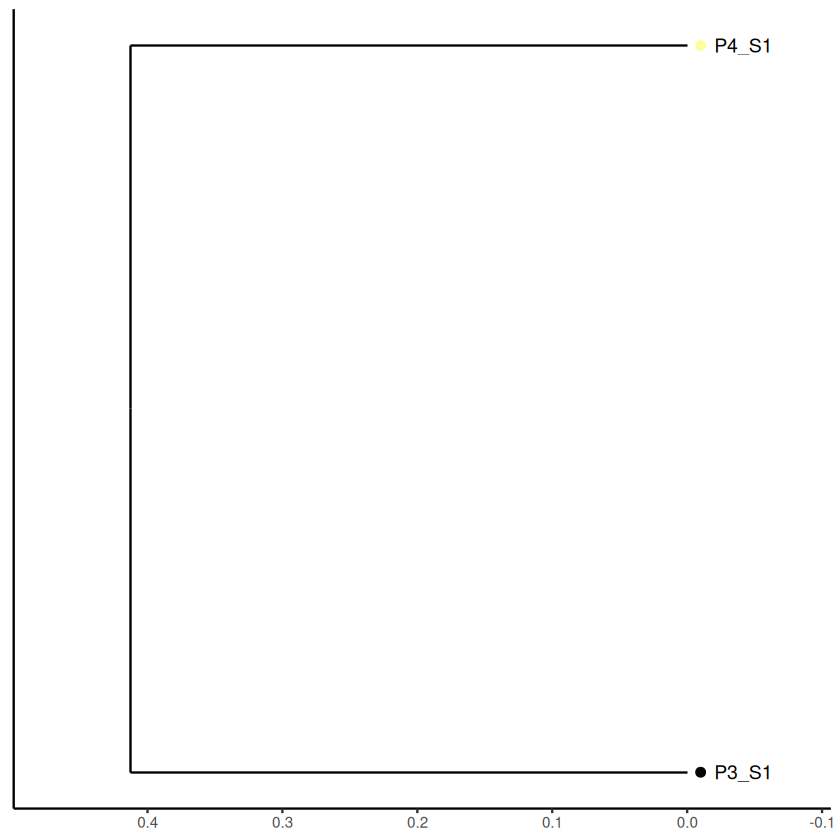

In [27]:
clonalSizeDistribution(combined.TCR_all, 
                       cloneCall = "aa", 
                       method= "ward.D2")

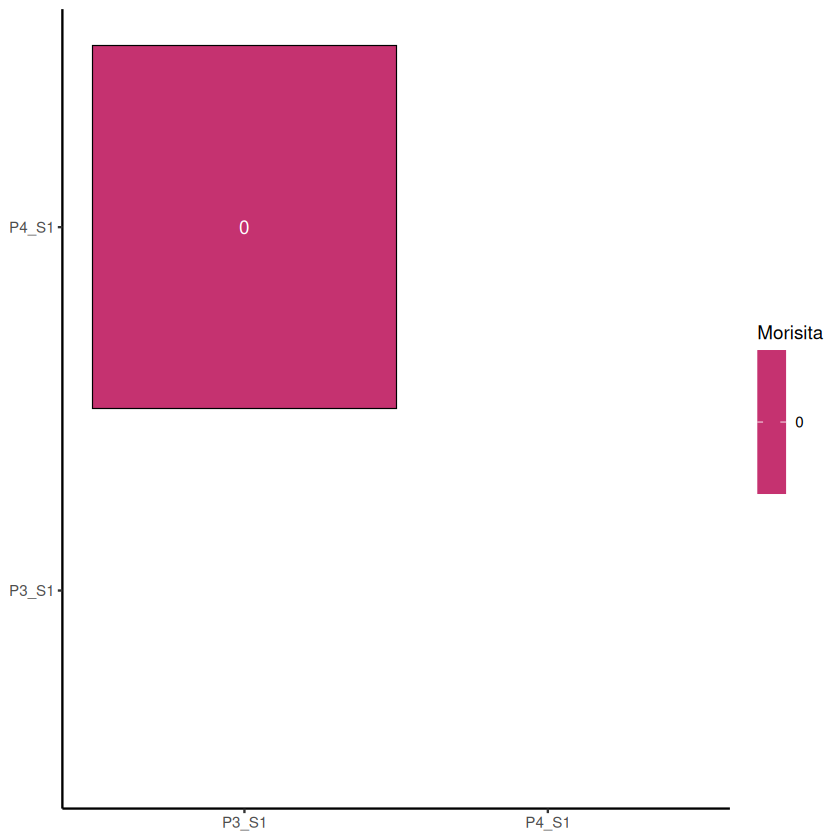

In [28]:
# clonal overlap to find similarity; corr. matrix
clonalOverlap(combined.TCR_all, 
              cloneCall = "strict", 
              method = "morisita")

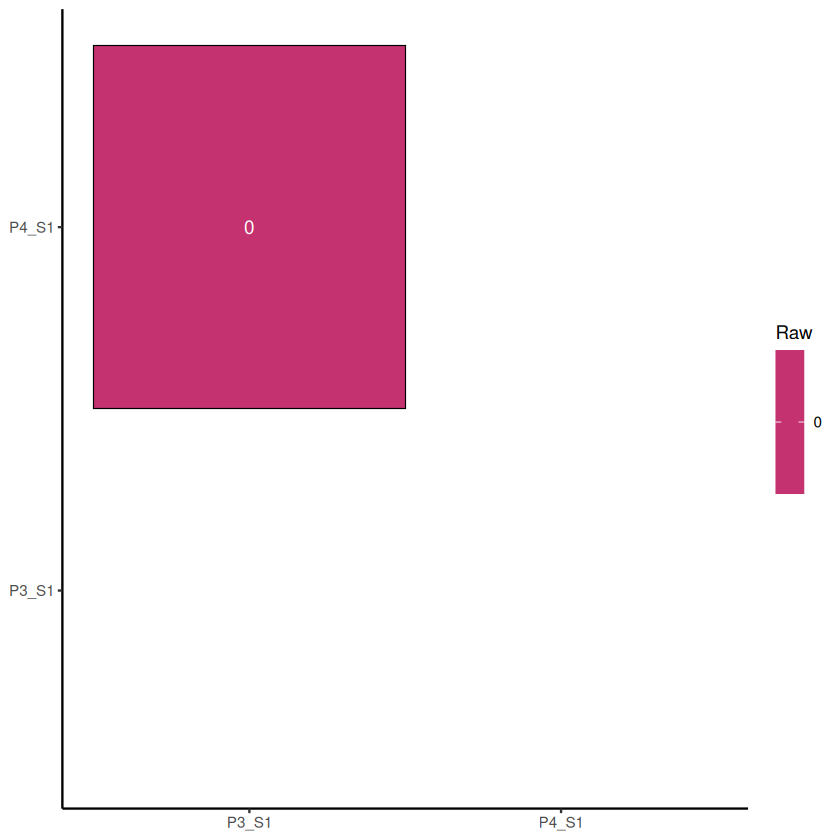

In [29]:
clonalOverlap(combined.TCR_all, 
              cloneCall = "strict", 
              method = "raw")

### Combining clones

In [32]:
# Check the first 10 variable features before removal
VariableFeatures(merged_seurat)[1:10]

[1] "CCL4"     "GNLY"     "HSPA1B"   "HSPA6"    "HSPA1A"   "HLA-DRA" 
 [7] "CXCL13"   "HLA-DRB1" "XCL1"     "CD74"

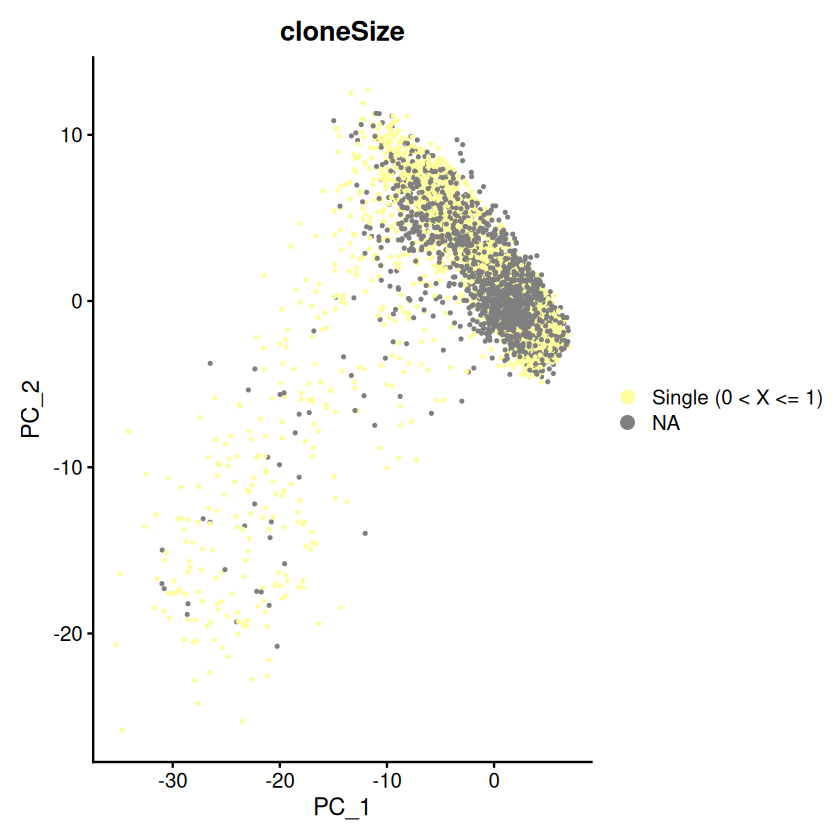

In [37]:
#Define color palette 
colorblind_vector <- hcl.colors(n=7, palette = "inferno", fixup = TRUE)

Seurat::DimPlot(sce_all_patients_new, group.by = "cloneSize") +
    scale_color_manual(values=rev(colorblind_vector[c(1,3,4,5,7)]))

In [38]:
# What's wrong with clone size calc??

## From the vignette - Visualizations for Single-Cell Objects
#### func: clonalOverlay, clonalNetwork, clonalOccupy, alluvialClones & getCirclize

In [44]:
sce_all_patients_new <- RunUMAP(sce_all_patients_new, dims = 1:30, reduction = "pca")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:01:09 UMAP embedding parameters a = 0.9922 b = 1.112

18:01:09 Read 6489 rows and found 30 numeric columns

18:01:09 Using Annoy for neighbor search, n_neighbors = 30

18:01:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:01:10 Writing NN index file to temp file /tmp/RtmptqqCcU/file76c2ec915eb

18:01:10 Searching Annoy index using 1 thread, search_k = 3000

18:01:11 Annoy recall = 100%

18:01:11 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 

#### Clonal overlay

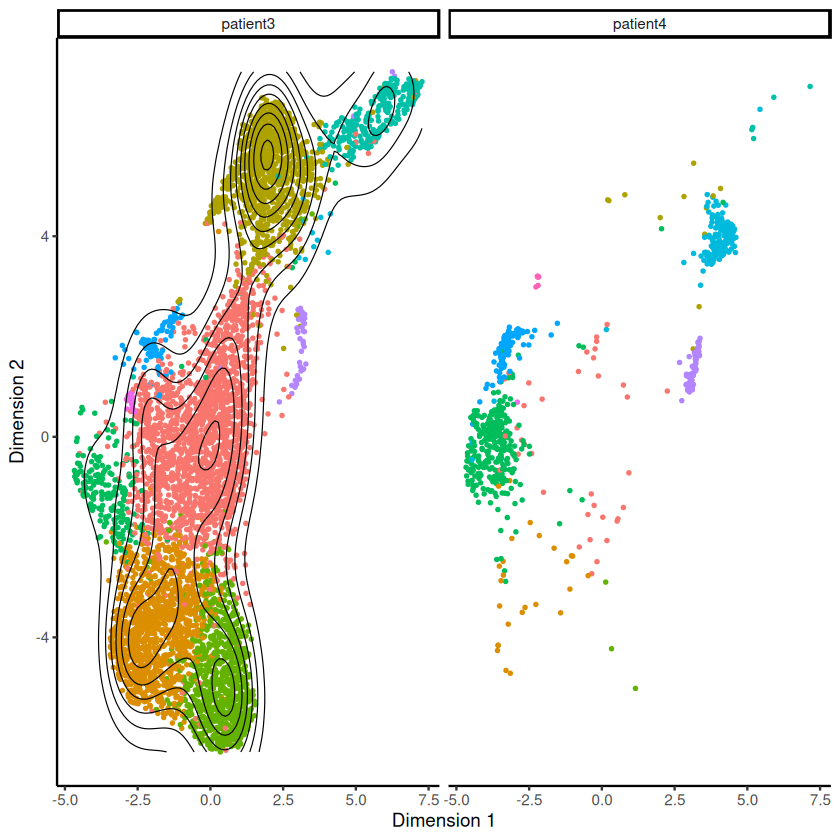

In [47]:
clonalOverlay(sce_all_patients_new, 
              reduction = "umap", 
              cutpoint = 1, 
              bins = 10, 
              facet.by = "orig.ident") + 
              guides(color = "none")

In [43]:
sce_all_patients_new

An object of class Seurat 
45180 features across 6489 samples within 2 assays 
Active assay: RNA (23874 features, 2000 variable features)
 5 layers present: counts.patient3, counts.patient4, data.patient3, data.patient4, scale.data
 1 other assay present: SCT
 3 dimensional reductions calculated: pca, pca.rna, integrated.rpca

#### Clonal network

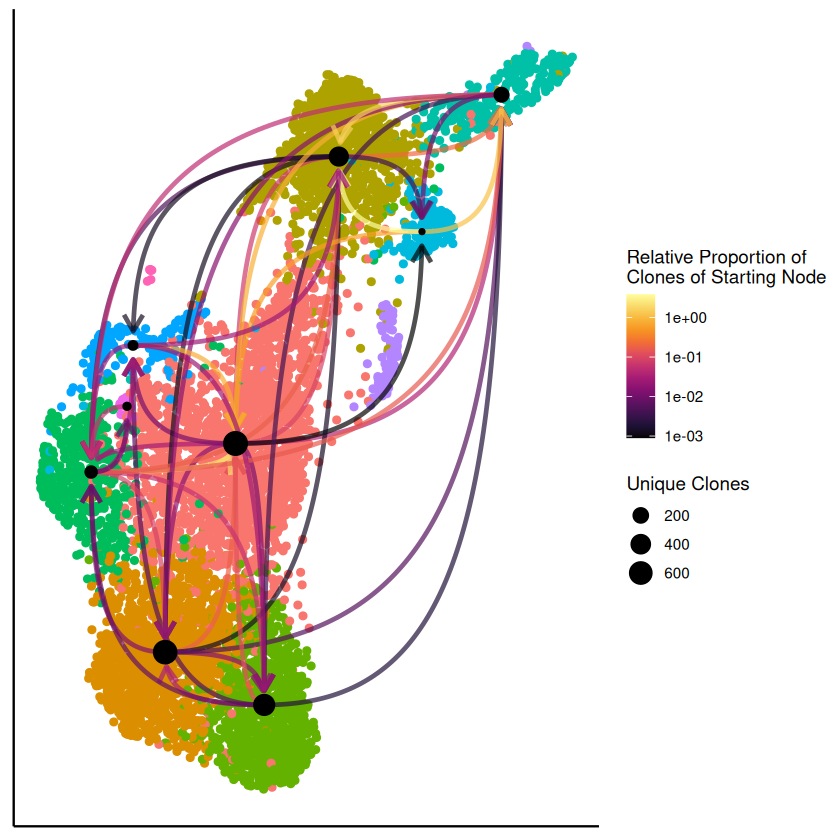

In [45]:
#ggraph needs to be loaded due to issues with ggplot
library(ggraph)

#No Identity filter
clonalNetwork(sce_all_patients_new, 
              reduction = "umap", 
              group.by = "seurat_clusters",
              filter.clones = NULL,
              filter.identity = NULL,
              cloneCall = "aa")

#### clonal occupy

clone size prob.

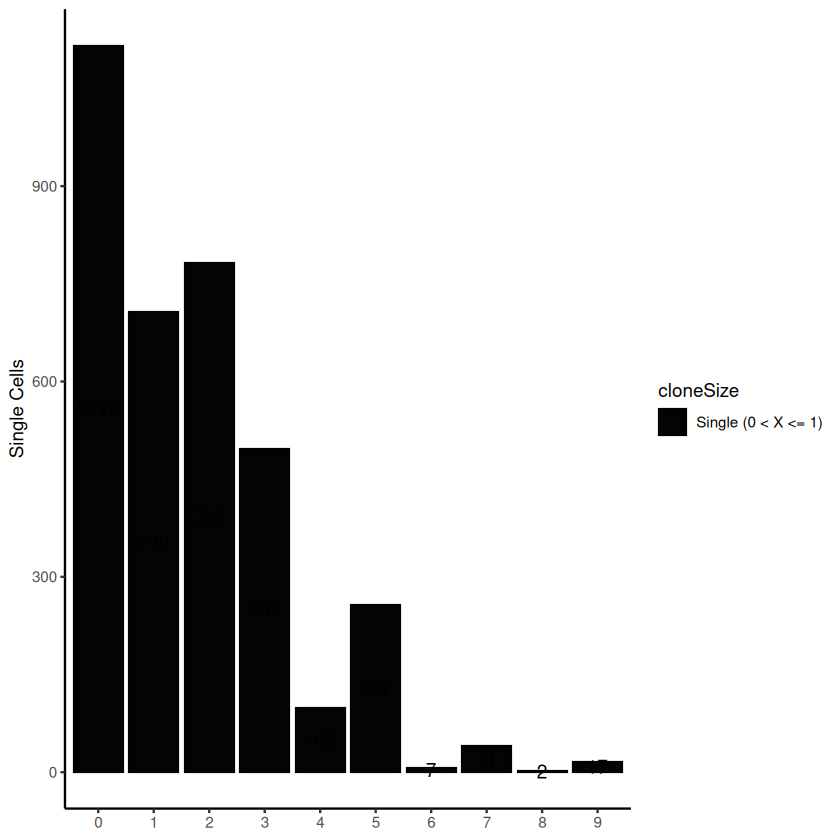

In [53]:
clonalOccupy(sce_all_patients_new, 
              x.axis = "seurat_clusters")

#### Chord diagrams

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




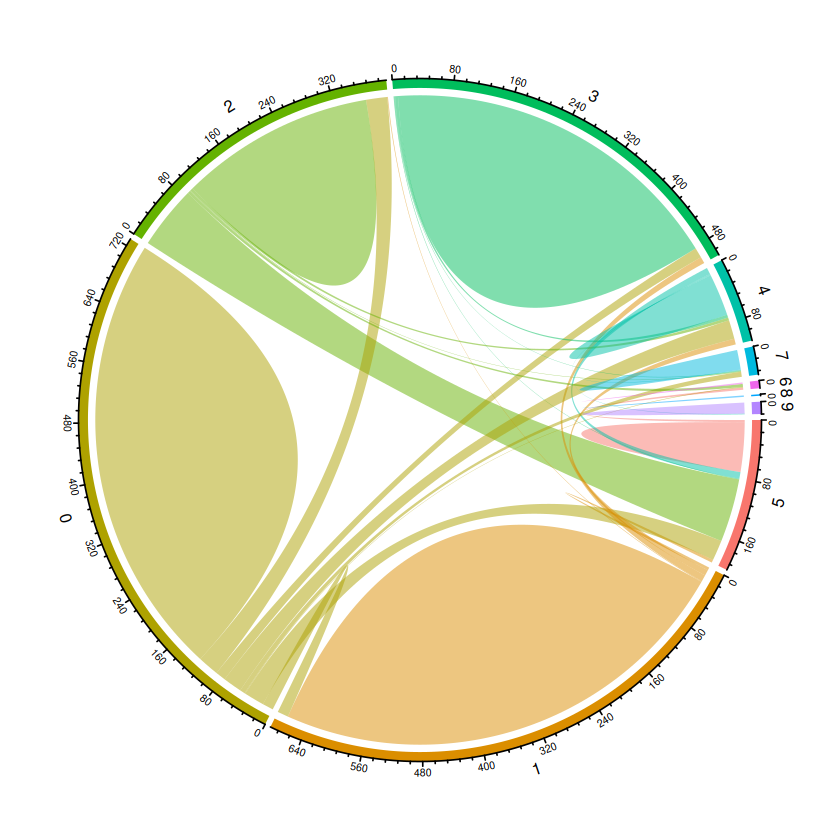

In [49]:
library(circlize)
library(scales)

circles <- getCirclize(sce_all_patients_new, 
                       group.by = "seurat_clusters")

#Just assigning the normal colors to each cluster
grid.cols <- hue_pal()(length(unique(sce_all_patients_new$seurat_clusters)))
names(grid.cols) <- unique(sce_all_patients_new$seurat_clusters)

#Graphing the chord diagram
chordDiagram(circles, self.link = 1, grid.col = grid.cols)

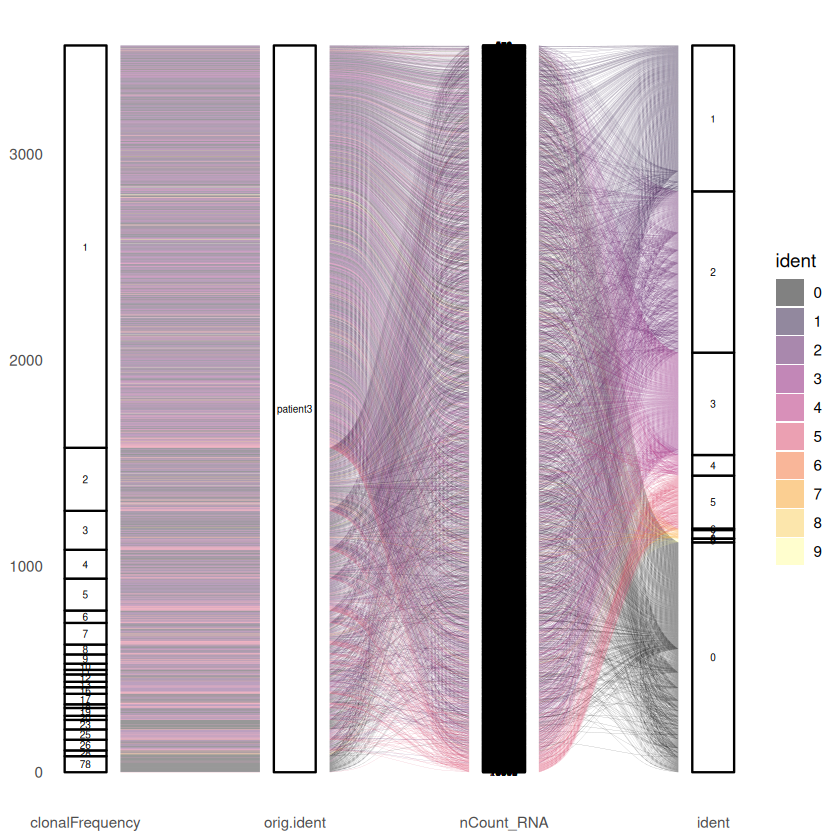

In [52]:
# just testing, no biological point
alluvialClones(sce_all_patients_new, 
                   cloneCall = "gene", 
                   y.axes = c("clonalFrequency", "orig.ident", "nCount_RNA"), 
                   color = "ident") 

## Clustering sequences

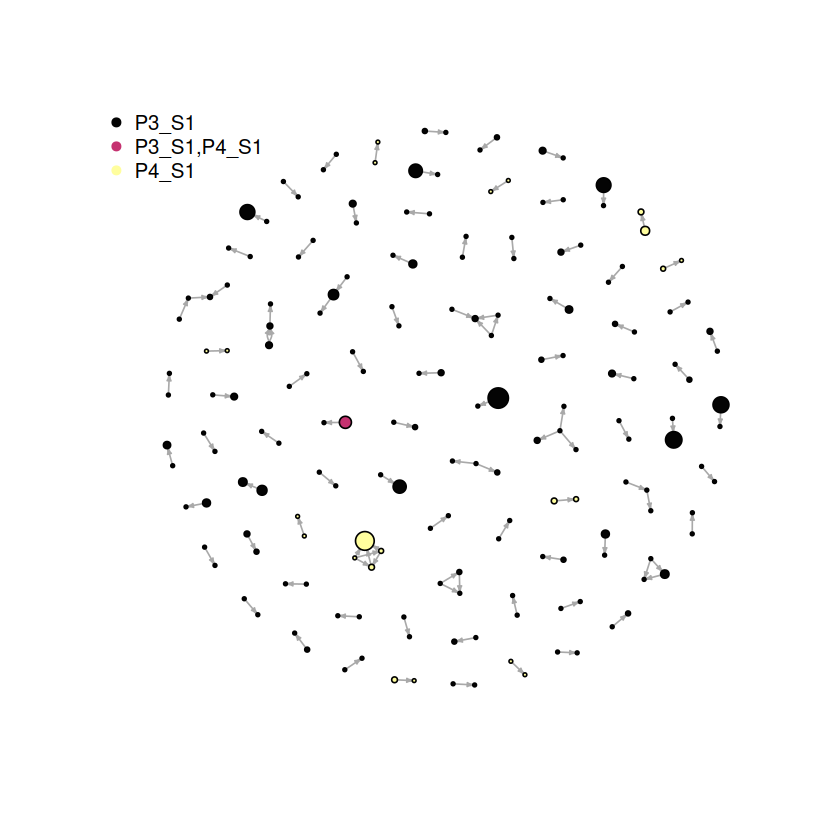

In [66]:
#igraph
##Clustering Patient samples
igraph.object <- clonalCluster(combined.TCR_all,
                               chain = "TRB",
                               sequence = "aa",
                               group.by = "sample",
                               threshold = 0.85, 
                               exportGraph = TRUE)

#Setting color scheme
col_legend <- factor(igraph::V(igraph.object)$group)
col_samples <- hcl.colors(3,"inferno")[as.numeric(col_legend)]
color.legend <- factor(unique(igraph::V(igraph.object)$group))

#Plotting
plot(
  igraph.object,
  vertex.size     = sqrt(igraph::V(igraph.object)$size),
  vertex.label    = NA,
  edge.arrow.size = .25,
  vertex.color    = col_samples
)
legend("topleft", legend = levels(color.legend), pch = 16, col = unique(col_samples), bty = "n")

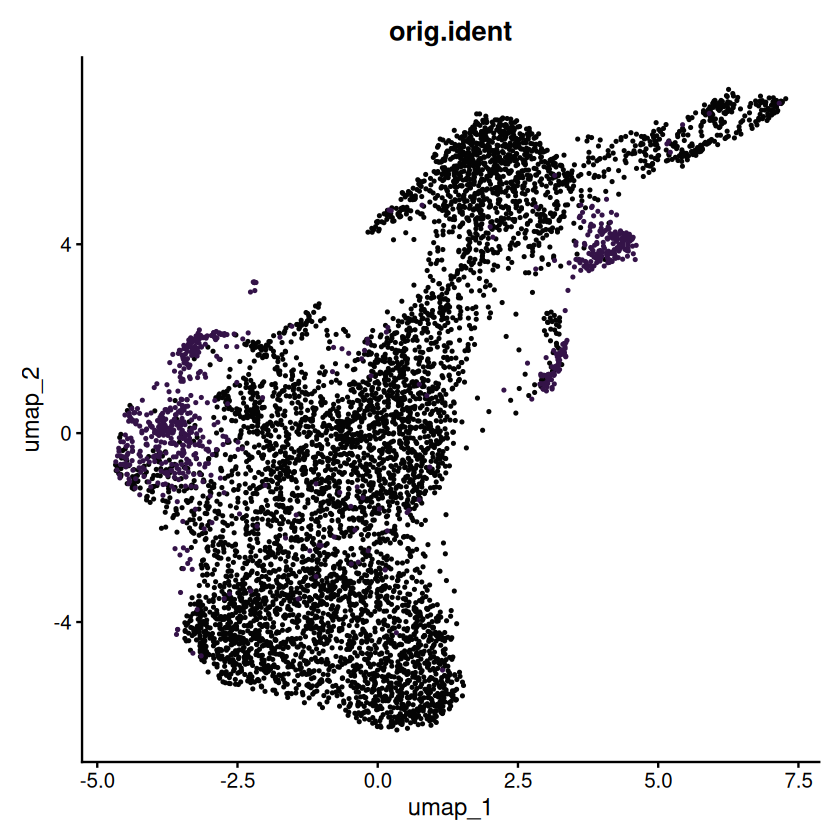

In [65]:
#Define color palette 
colorblind_vector <- hcl.colors(n=7, palette = "inferno", fixup = TRUE)

DimPlot(sce_all_patients_new, group.by = "orig.ident") +
    scale_color_manual(values =  hcl.colors(n=length(unique(scRep_example@meta.data[,"orig.ident"])), "inferno")) + 
  NoLegend()